# Titanic EDA

First exploratory data analysis of Titanic dataset.

## Goals:
1. Load and inspect data
2. Check for missing values  
3. Visualize distributions
4. Analyze correlations with survival

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
print("Libraries imported successfully")
print("Pandas version:", pd.__version__)

Libraries imported successfully
Pandas version: 2.2.3


In [3]:
os.getcwd()

'C:\\Users\\jack\\titanic-ml-git-demo\\notebooks'

In [4]:
os.chdir('..')

In [5]:
project_dir = os.getcwd()
project_dir

'C:\\Users\\jack\\titanic-ml-git-demo'

In [6]:
os.chdir('notebooks')

In [7]:
data_raw_train_path = os.path.join(project_dir, "data", "raw", "train.csv")

# Выгрузка данных
# Получение первичной информации

In [8]:
df = pd.read_csv(data_raw_train_path)
print(f"Data shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Data shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print("ИНФО")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values per column:")
print(df.isnull().sum())

ИНФО
Rows: 891, Columns: 12

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Первичный анализ:
1) большинство признаков не имеет пропусков, что дает возможность составлять модели на более "достоверных" данных (без заполнения, которое могло бы существенно повлиять на обучение)
2) колонка Cabin имеет подавляющее количество пропусков (> 50% от всех наблюдений). Значит, от этой колонки целесообразно избавится.
3) колонка Age имеет 177 пропусков (~20% от наблюдений). Разумнее заменить статистическими значениями, или методами кластерного анализа
4) Name - идивидуальный идентификатор, такой же как PassengerId.Так как производится анализ и построение модели на основе общих признаков объекта (человека), то имя является избытычным для данной цели (непонятно как анализировать и что анализировать). Следует не учитывать в построении модели признаков.
5) Ticket - случайное число, а значит оно никак не влияет на целевое значение Survived. Следует убрать.
6) PassengerId - дублирует id в самом dataframe. Однако стоит сохранить (для будущего анализа). Само Id не влияет на целевое значение
7) категориальные признаки: cat_ftr = ['Pclass', 'Sex', 'Embarked']
8) ординальные признаки: ord_ftr = ['SibSp', 'Parch']
9) числовые признаки: num_ftr = ['Age', 'Fare']
10) целесообразные признаки: all_ftr = ['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare']

In [36]:
cat_ftr = ['Pclass', 'Sex', 'Embarked']
ord_ftr = ['SibSp', 'Parch']
num_ftr = ['Age', 'Fare']
all_ftr = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare']

In [37]:
print("статистика для числовых данных")
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].describe()

статистика для числовых данных


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
dt_train = df[all_ftr + ['Survived']] # сжатие датафрейма до целесообразных признаков
dt_train

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare,Survived
0,3,male,1,0,S,22.0,7.2500,0
1,1,female,1,0,C,38.0,71.2833,1
2,3,female,0,0,S,26.0,7.9250,1
3,1,female,1,0,S,35.0,53.1000,1
4,3,male,0,0,S,35.0,8.0500,0
...,...,...,...,...,...,...,...,...
886,2,male,0,0,S,27.0,13.0000,0
887,1,female,0,0,S,19.0,30.0000,1
888,3,female,1,2,S,NaN,23.4500,0
889,1,male,0,0,C,26.0,30.0000,1


# Анализ для распределения категориальных признаков:
Для каждой категории сформируем распредления: распределение количества пассажиров в данных категориях, доля числа "выживших" и "не выживших" от всего числа пассажиров, условная доля "выживания" в каждой группе.
1) Pclass - видно, что вероятность "не выжить" пропорционально номеру класса (причем в 3-ем классе это значение резко увеличивается до 41%). При этом вероятность "выжить" относительно классов не изменяется и остается в среднем на уровне 13%. Условная вероятность выживания следующее: 1 класс - 0.62; 2 класс - 0.47; 3 класс - 0.24. В итоге, Pclass служит хорошим критерием на разделение людей по вероятности "выживани".
2) Sex - вероятность "не вижить" у мужчин намного больше (>50%), чем у женжин (12%). При этом вероятность "выжить" у женщин в 2 раза больше? чему у мужчин. Соответственно, условная вероятность "не выжить": у мижчин - 0.83, у женщин - 0.25. Значит, пол является также весомой характеристикой для определения вероятности выживания.
3) SibSp - самыми распространенными значениями для данного признака являются 0, 1 (другие значения редки и не сильно влиют на выживаемость). Вероятность выжить именно при этих двух значениях большие (как и "не выжить").
4) Parch - распространенные значения 0, 1 и 2. Именно в этих группах есть возможность "выжить".
5) Embarked - вероятности "выжить" и "не выжить" падают при отправки из более позднего порта. Это бъясняется тем, что из порта S отбыло большего всего людей в отличие от C и Q, что качествено влияет на вероятности для выживания. При этом условные вероятности "не выжить" следующие: S порт - 66%, С порт - 44%, Q порт - 61%.

Также не мало важен фактор дисбаланса количества пассажиров в каждой группе отдельной категории. Так больше всего людей из 3-го класса, мужчин, одиноко странствующих и выплывшие из порта S. И в каждой из этих групп наибольший процент "невыживаемости".  

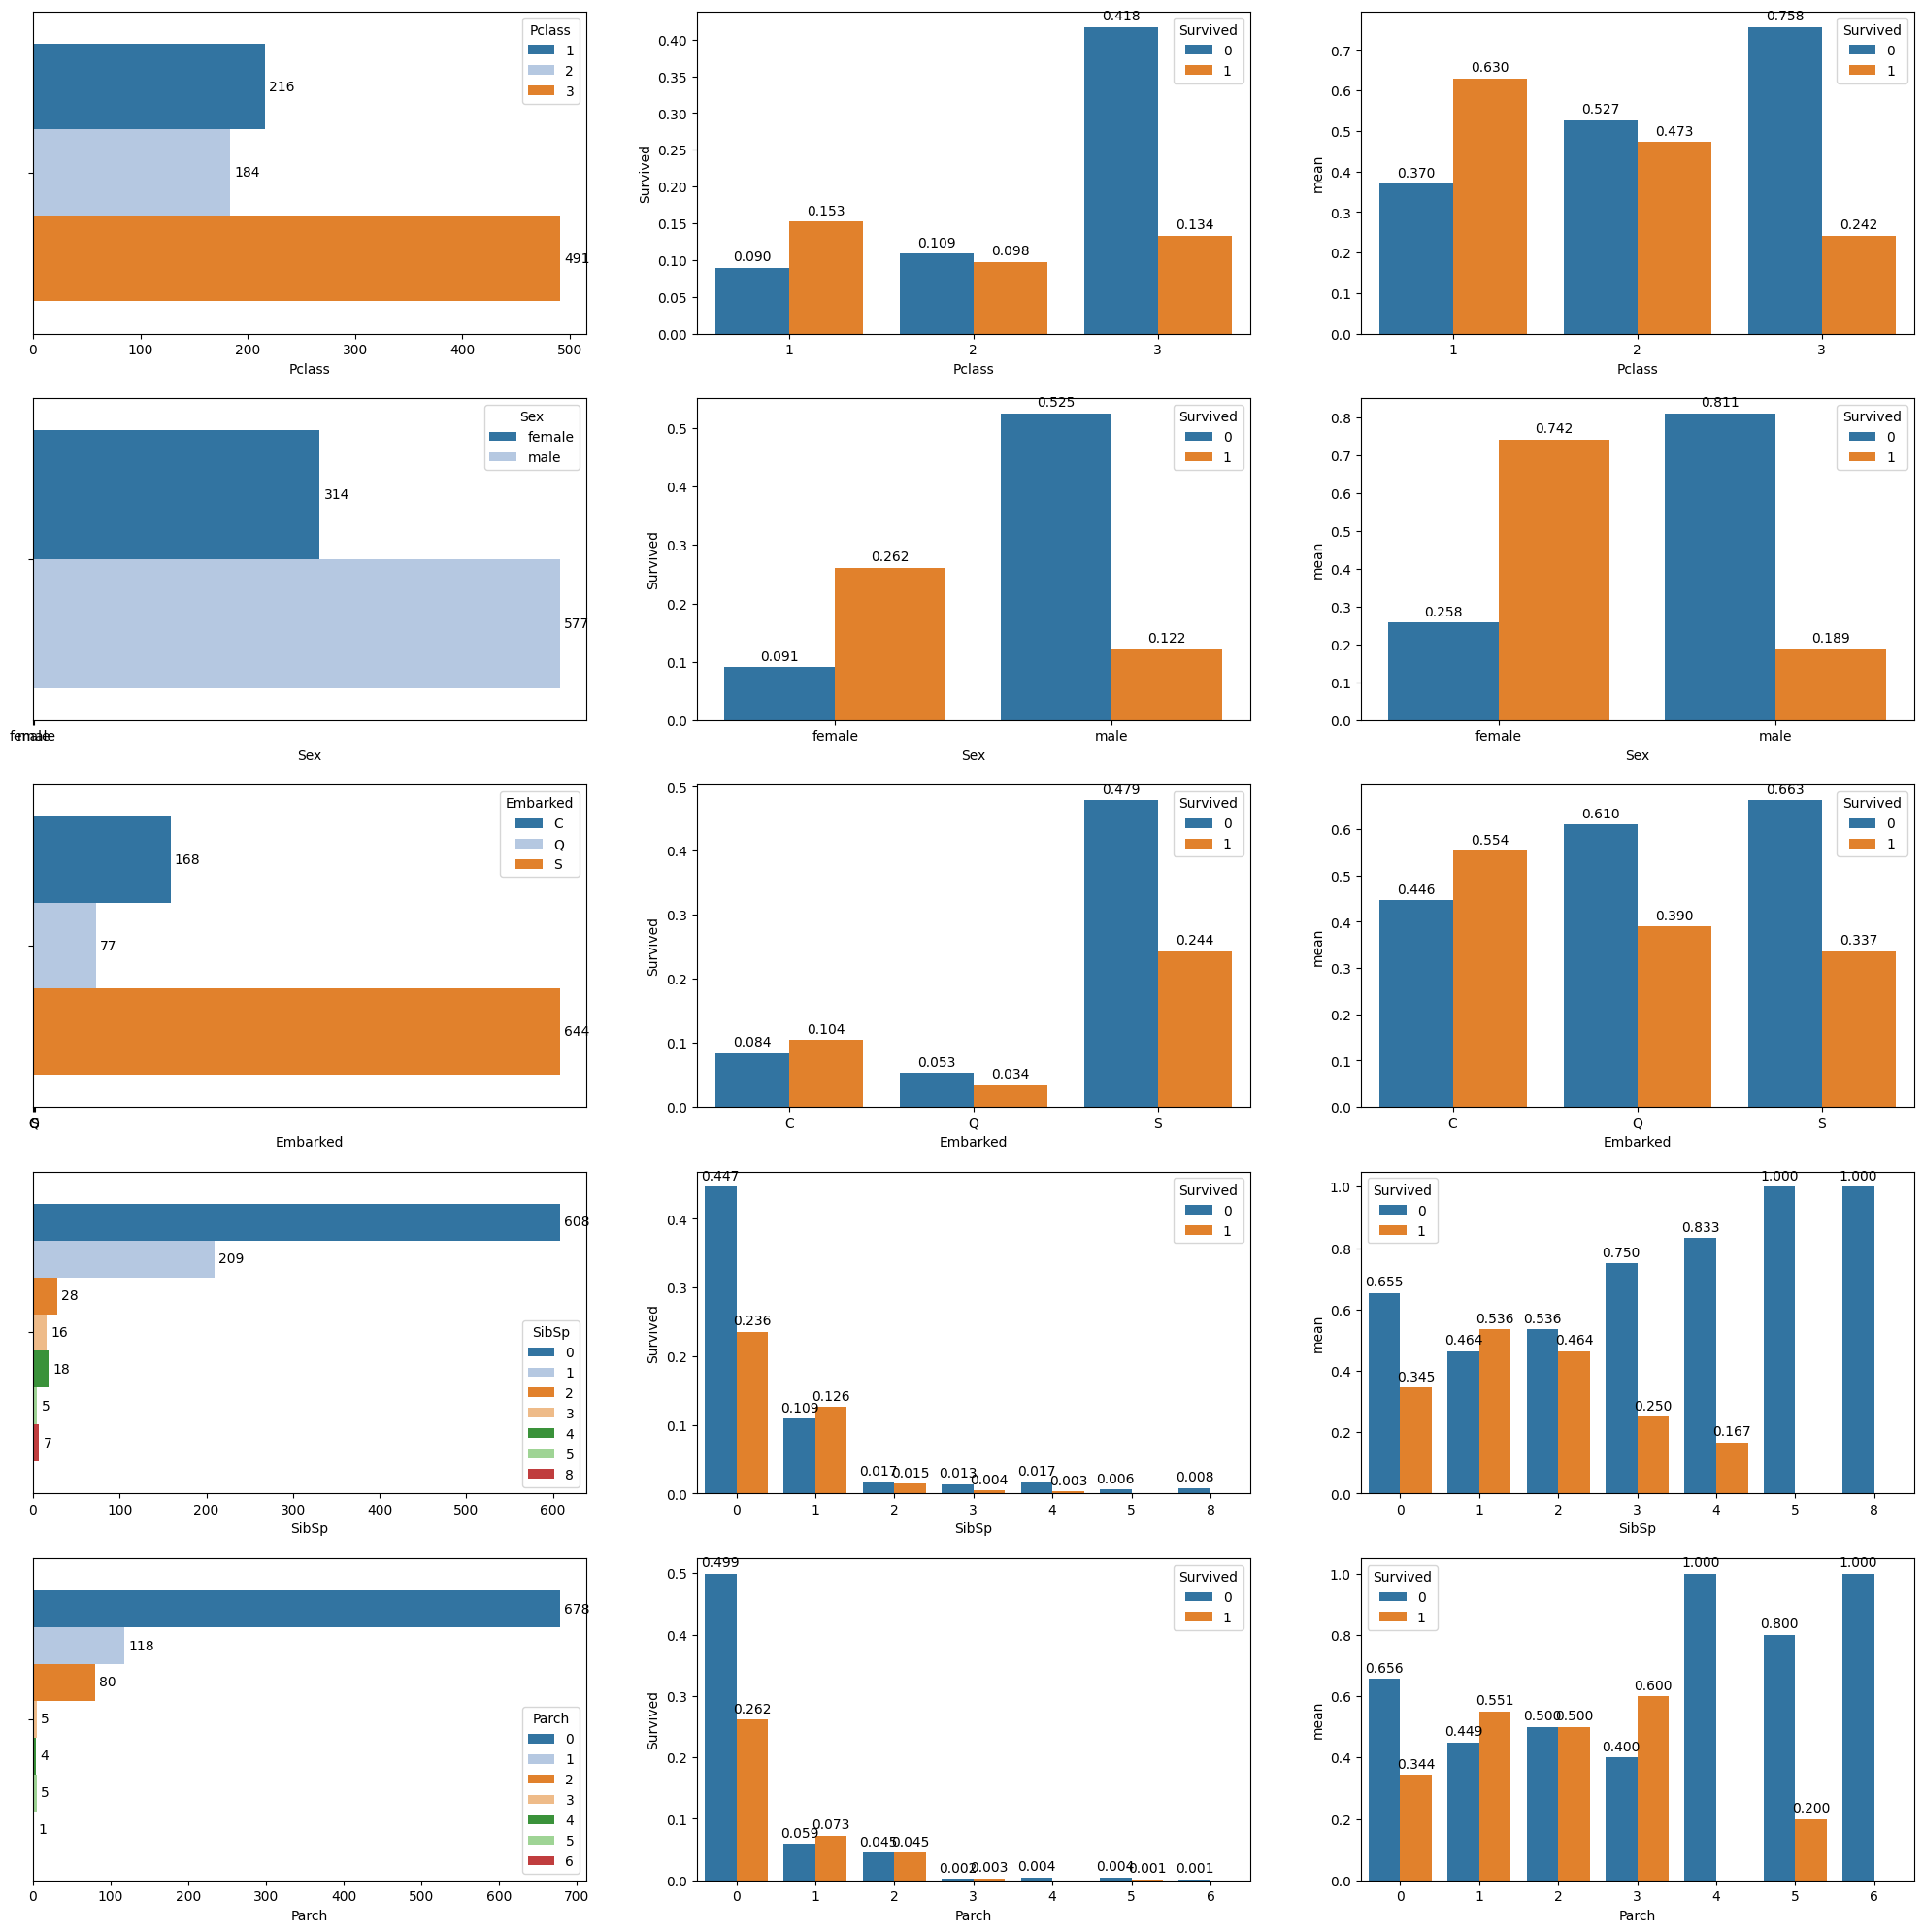

In [40]:
cat_ord_ftr = cat_ftr + ord_ftr
fig, axes = plt.subplots(len(cat_ord_ftr), 3, figsize = (25, 25))
for i in range(len(cat_ord_ftr)):
    L = [0]*3
    L[0] = sb.barplot(dt_train.sort_values(cat_ord_ftr[i]), x=cat_ord_ftr[i], hue=cat_ord_ftr[i], estimator=len, ax=axes[i][0], palette='tab20')
    L[1] = sb.barplot(dt_train.sort_values(cat_ord_ftr[i]), x=cat_ord_ftr[i], y='Survived', hue='Survived', estimator= lambda x: len(x)/891, ax=axes[i][1])
    dt_cat_srv = dt_train.groupby([cat_ord_ftr[i], 'Survived']).size().reset_index(name='count')
    dt_cat_srv['mean'] = dt_cat_srv['count'] / dt_cat_srv.groupby(cat_ord_ftr[i])['count'].transform('sum')
    L[2] = sb.barplot(dt_cat_srv.sort_values(cat_ord_ftr[i]), x=cat_ord_ftr[i], y='mean', hue='Survived', estimator=np.mean, errorbar=None, ax=axes[i][2])
    for j in range(3):
        for container in L[j].containers:
            if j == 0:
                L[0].bar_label(container, padding=3)
            else:
                L[j].bar_label(container, fmt='%.3f', padding=3)

# Анализ для числовых значений
Сформируем распределение количества пассажиров по возрасту и по тратам, долю выживаемости/невыживаемости по данным признакам.
1) Age - вероятность выжить у "новорожденных" (<10) больше всего (больше, чем "не выжить"). Для остальных возрастных групп вероятность "выжить" всегда меньше, чем "не выжить". Больше всего разница между этими показателями у "молодых людей" (от 18 до 35 лет). Данное соотношение объясняется дисбалансом в данных - больше всего на борту именно молодых людей, что в общем и целом сказывается на долевое соотношения выживаемости.
2) Fare - вероятность "выжить" у пассажиров с меньшеми тратами - больше. Однако в сравнении между вероятностями "выжить" и "не выжить" признак Fare лишь слегка может повлиять на выживаемость. Потому что вероятность "не выжить" у пассажиров с меньшеми тратами - экстремально высоко (превышает вероятность "выжить").

Как и в случае категориальных/дискретных велечин, дисбаланс очень сильно сказывается на все данные группы. Так Fare в меньшей степени может дать информацию об "выживаемости" пассажира.

C:\Users\jack\AppData\Local\Temp\ipykernel_8568\3868122717.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(dt_train, x=num_ftr[i], stat='probability', ax=axes[i][0], palette='Set2', alpha=0.6, multiple='layer')
C:\Users\jack\AppData\Local\Temp\ipykernel_8568\3868122717.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(dt_train, x=num_ftr[i], stat='probability', ax=axes[i][0], palette='Set2', alpha=0.6, multiple='layer')


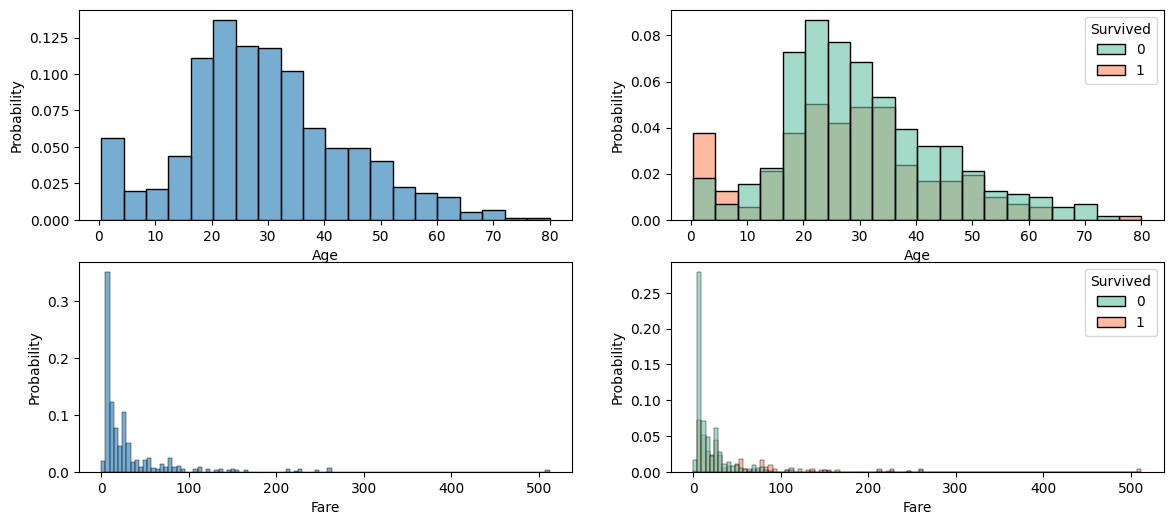

In [41]:
fig, axes = plt.subplots(len(num_ftr), 2, figsize = (14, 6))
for i in range(len(num_ftr)):
    sb.histplot(dt_train, x=num_ftr[i], stat='probability', hue='Survived', ax=axes[i][1], palette='Set2', alpha=0.6, multiple='layer')
    sb.histplot(dt_train, x=num_ftr[i], stat='probability', ax=axes[i][0], palette='Set2', alpha=0.6, multiple='layer')

# Влияние на целевое значение "выживания"
1) к ключевым факторам выживаемости можно отнести: Pclass, Sex, Embarked, Age
2) влияет, но в меньшей степени: SibSp, Parch
3) почти не влияет: Fare - в силу того, что Pclass так же отражает схожий признак пассажира (по богатству и статусу).

Однако проверим графические интерпретации с помощью MI

In [28]:
dt_train_notna = dt_train.dropna().reset_index()
dt_train_notna.loc[:, 'Not Survived'] = 1 - dt_train_notna.loc[:, 'Survived']
dt_train_notna

,index,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare,Survived,Not Survived
0,0,1,3,male,1,0,S,22.0,7.2500,0,1
1,1,2,1,female,1,0,C,38.0,71.2833,1,0
2,2,3,3,female,0,0,S,26.0,7.9250,1,0
3,3,4,1,female,1,0,S,35.0,53.1000,1,0
4,4,5,3,male,0,0,S,35.0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...
707,885,886,3,female,0,5,Q,39.0,29.1250,0,1
708,886,887,2,male,0,0,S,27.0,13.0000,0,1
709,887,888,1,female,0,0,S,19.0,30.0000,1,0
710,889,890,1,male,0,0,C,26.0,30.0000,1,0


In [34]:
from sklearn.feature_selection import mutual_info_classif

# Закодируй категориальные
X_encoded = pd.get_dummies(dt_train_notna[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']], drop_first=True)
mi_scores = mutual_info_classif(X_encoded, dt_train_notna['Survived'])

mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values('MI_Score', ascending=False)
print("\nMI о выживаемости:")
print(mi_df)


MI о выживаемости:
      Feature  MI_Score
5    Sex_male  0.153843
2        Fare  0.133693
0      Pclass  0.092157
4       Parch  0.033345
3       SibSp  0.029748
1         Age  0.026164
7  Embarked_S  0.003684
6  Embarked_Q  0.000000


In [35]:
mi_scores = mutual_info_classif(X_encoded, dt_train_notna['Not Survived'])

mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values('MI_Score', ascending=False)
print("\nMI о невыживаемости:")
print(mi_df)


MI о невыживаемости:
      Feature  MI_Score
5    Sex_male  0.140506
2        Fare  0.137170
0      Pclass  0.097275
4       Parch  0.043870
6  Embarked_Q  0.011373
7  Embarked_S  0.009992
3       SibSp  0.000000
1         Age  0.000000


## Выводы:
Используя предыдущие наблюдения и MI анализ вытекают следующие результаты:
I. На "выживаемость" влияют:
1) В большей степени: Sex, Fare, Pclass
2) В средней степени: Parch, SibSp, Age
3) В меньшей степени: Embarked

II. На "невыживаемость":
1) В большей степени: Sex, Fare, Pclass
2) В средней степени: Parch, Embarked
3) В меньшей степени: SibSp, Age